In [1]:
import keras

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
keras.__version__

'2.2.0'

In [3]:
# Upgrading Python Package
#! pip install --upgrade keras

In [4]:
# Uninstall a Python Package
#! pip uninstall keras

In [5]:
from keras.datasets import fashion_mnist

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [7]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [9]:
import matplotlib.pyplot as plt

8


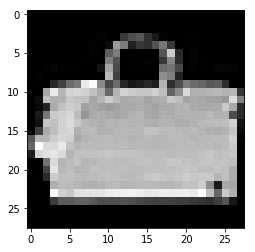

In [10]:
print(y_train[99])
plt.imshow(x_train[99], cmap='gray')

In [11]:
type(fashion_mnist)

module

In [12]:
x_train[99].min(), x_train[99].max()

(0, 255)

In [13]:
x_train = x_train /255.0
x_test = x_test / 255.0 

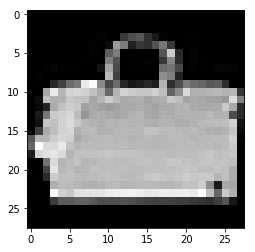

In [14]:
plt.imshow(x_train[99], cmap='gray')

In [15]:
x_train[99].min(), x_train[99].max()

(0.0, 1.0)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam
from keras.activations import relu, softmax

In [17]:
model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [18]:
model.compile(optimizer=Adam(), loss=sparse_categorical_crossentropy, metrics=["accuracy"])

In [19]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 14s 232us/step - loss: 0.5076 - acc: 0.8221
Epoch 2/5
60000/60000 [==============================] - 14s 227us/step - loss: 0.3750 - acc: 0.8659
Epoch 3/5
60000/60000 [==============================] - 15s 251us/step - loss: 0.3341 - acc: 0.8791
Epoch 4/5
60000/60000 [==============================] - 16s 259us/step - loss: 0.3083 - acc: 0.8871
Epoch 5/5
60000/60000 [==============================] - 14s 237us/step - loss: 0.2875 - acc: 0.89501s


In [20]:
x_train.shape

(60000, 28, 28)

In [67]:
model_history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 12s 260us/step - loss: 0.2244 - acc: 0.9169 - val_loss: 0.3027 - val_acc: 0.8876
Epoch 2/5
48000/48000 [==============================] - 13s 272us/step - loss: 0.2180 - acc: 0.9195 - val_loss: 0.2737 - val_acc: 0.9005
Epoch 3/5
48000/48000 [==============================] - 14s 283us/step - loss: 0.2101 - acc: 0.9223 - val_loss: 0.2864 - val_acc: 0.8968
Epoch 4/5
48000/48000 [==============================] - 14s 286us/step - loss: 0.2013 - acc: 0.9268 - val_loss: 0.2820 - val_acc: 0.8985
Epoch 5/5
48000/48000 [==============================] - 15s 309us/step - loss: 0.1946 - acc: 0.9287 - val_loss: 0.2905 - val_acc: 0.8928


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.to_json()

'{"class_name": "Sequential", "config": [{"class_name": "Flatten", "config": {"name": "flatten_1", "trainable": true, "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "units": 512, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": nu

In [94]:
#Save a model prams

In [22]:
with open("fashion_mnist_model.json", "w") as my_file:
    my_file.write(model.to_json())

In [23]:
#! dir

In [24]:
model.save_weights("fashion_mnist_weights.h5")

In [110]:
#! dir

In [25]:
model.save("fashion_mnist_all_model")

In [120]:
from keras.callbacks import TensorBoard, ModelCheckpoint

In [121]:
tb = TensorBoard()
ckpt = ModelCheckpoint("model_epoch", save_best_only=True)

In [ ]:
model_history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[tb, ckpt])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 263us/step - loss: 0.0942 - acc: 0.9663 - val_loss: 0.3508 - val_acc: 0.8975
Epoch 2/10
48000/48000 [==============================] - 15s 308us/step - loss: 0.0984 - acc: 0.9637 - val_loss: 0.3456 - val_acc: 0.8969
Epoch 3/10
48000/48000 [==============================] - 14s 282us/step - loss: 0.0941 - acc: 0.9649 - val_loss: 0.3502 - val_acc: 0.9014
Epoch 4/10
48000/48000 [==============================] - 15s 306us/step - loss: 0.0893 - acc: 0.9670 - val_loss: 0.3463 - val_acc: 0.8960
Epoch 5/10
48000/48000 [==============================] - 14s 302us/step - loss: 0.0881 - acc: 0.9675 - val_loss: 0.4041 - val_acc: 0.8868
Epoch 6/10
48000/48000 [==============================] - 13s 268us/step - loss: 0.0849 - acc: 0.9694 - val_loss: 0.3440 - val_acc: 0.9021
Epoch 7/10
19968/48000 [===========>..................] - ETA: 6s - loss: 0.0757 - acc: 0.9726- ETA: 8s -